# Data Visualization

In [1]:
import pandas as pd             
import numpy as np

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('train.csv')
all_data=df.copy(deep=True)
all_data_na = (all_data.isnull().sum(axis=0) / len(all_data)) * 100
from datetime import date
import datetime

df['Day'] = df['DATE'].apply(lambda x: 
                      (date(datetime.datetime.strptime(x,"%Y-%m-%d").year,datetime.datetime.strptime(x,"%Y-%m-%d").month,
                      datetime.datetime.strptime(x,"%Y-%m-%d").day)-date(2019,4,10)).days)
df.drop(['DATE'],axis=1,inplace=True)

target_variable='aircon_sum_target_next14d'
input_variables=df.columns[df.columns!=target_variable]

input_data=df.loc[:,input_variables]
target_data=df.loc[:,target_variable]



In [36]:
target_data

0         0
1         0
2         0
3         0
4         0
         ..
621295    0
621296    0
621297    0
621298    0
621299    0
Name: aircon_sum_target_next14d, Length: 621300, dtype: int64

In [ ]:
input_data.head()

SITE_ID  CELL_TYPE_Macro  CELL_TYPE_Mobil  CELL_TYPE_TRP  \
0      146                1                0              0   
1      146                1                0              0   
2      146                1                0              0   
3      146                1                0              0   
4      146                1                0              0   

   CELL_TYPE_Tx site  CELL_TYPE_micro  N_TRANSPORTED_SITES  \
0                  0                0                  3.0   
1                  0                0                  3.0   
2                  0                0                  3.0   
3                  0                0                  3.0   
4                  0                0                  3.0   

   GEOGRAPHIC_CLUSTER_K_0  GEOGRAPHIC_CLUSTER_K_1  GEOGRAPHIC_CLUSTER_K_2  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   ...  skew_fire/smoke_alarms_prev14d  skew_ge_alarms_prev14d  \
0  ...                             0.0                     0.0   
1  ...                             0.0                     0.0   
2  ...                             0.0                     0.0   
3  ...                             0.0                     0.0   
4  ...                             0.0                     0.0   

   skew_power_alarms_prev14d  skew_temperature_alarms_prev14d  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   

   kurt_equipment_alarms_prev14d  kurt_fire/smoke_alarms_prev14d  \
0                      -1.212308                       -1.212308   
1                      -1.212308                       -1.212308   
2                      -1.212308                       -1.212308   
3                      -1.212308                       -1.212308   
4                      -1.212308                       -1.212308   

   kurt_ge_alarms_prev14d  kurt_power_alarms_prev14d  \
0               -1.212308                  -1.212308   
1               -1.212308                  -1.212308   
2               -1.212308                  -1.212308   
3               -1.212308                  -1.212308   
4               -1.212308                  -1.212308   

   kurt_temperature_alarms_prev14d  Day  
0                        -1.212308    0  
1                        -1.212308    1  
2                        -1.212308    2  
3                        -1.212308    3  
4                        -1.212308    4  

[5 rows x 135 columns]

In [6]:
input_data.describe(include='all')

SITE_ID  ...            Day
count  621300.000000  ...  621300.000000
mean     1315.745534  ...     149.500000
std       751.146117  ...      86.602129
min         0.000000  ...       0.000000
25%       663.000000  ...      74.750000
50%      1328.000000  ...     149.500000
75%      1965.000000  ...     224.250000
max      2604.000000  ...     299.000000

[8 rows x 135 columns]

In [ ]:
# categorical_variables_mask = input_data.dtypes==object
# categorical_variables = input_data.columns[categorical_variables_mask].tolist()
# print(categorical_variables)
# numerical_variables = input_data.columns[~categorical_variables_mask].tolist()
#numerical_variables.remove('NumberOfSales')
numerical_variables

In [7]:
site_IDs=df['SITE_ID']
Dates=df['Day']
N_Transported_Sites=df[ 'N_TRANSPORTED_SITES']
Cell_Type=df.loc[:, 'CELL_TYPE_Macro': 'CELL_TYPE_micro']
Geographical_Cluster=df.loc[:, 'GEOGRAPHIC_CLUSTER_K_0': 'GEOGRAPHIC_CLUSTER_K_9']
m3_w_prevXd=df.loc[ :, 'mean_temperature_prev7d':  'min_pressure_prev3d']
m3_w_f_nextXd=df.loc[:,'mean_temperature_f_next14d':'min_pressure_f_next7d']
aircon_sum=df.loc[:,'aircon_sum_wo_prev7d':'aircon_sum_wo_prev14d']
cat_sum_alarms_prevXd=df.loc[:,'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
cat_m3_persistance_prevXd=df.loc[:,'equipment_max_persistance_prev7d':'temperature_min_persistance_prev3d']
skew_cat_alarms_prev14d=df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d=df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
target_data=df.loc[:,'aircon_sum_target_next14d']

In [8]:
#df_row = pd.concat([df1, df2])
train_data=pd.concat([m3_w_prevXd,m3_w_f_nextXd,cat_sum_alarms_prevXd,cat_m3_persistance_prevXd], axis=1)
#np.shape(cat_m3_persistance_prevXd)
train_data

mean_temperature_prev7d  ...  temperature_min_persistance_prev3d
0                         10.29  ...                                 0.0
1                         11.71  ...                                 0.0
2                         11.57  ...                                 0.0
3                         11.29  ...                                 0.0
4                         10.57  ...                                 0.0
...                         ...  ...                                 ...
621295                     4.00  ...                                 0.0
621296                     4.29  ...                                 0.0
621297                     4.71  ...                                 0.0
621298                     5.57  ...                                 0.0
621299                     6.14  ...                                 0.0

[621300 rows x 105 columns]

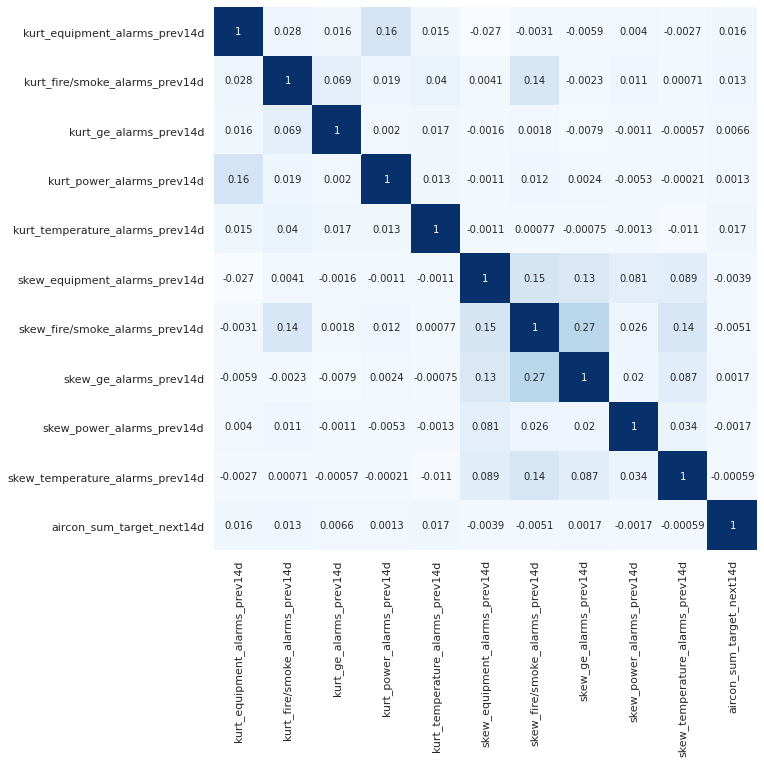

In [41]:
cov=pd.concat([kurt_cat_alarms_prev14d,skew_cat_alarms_prev14d],axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

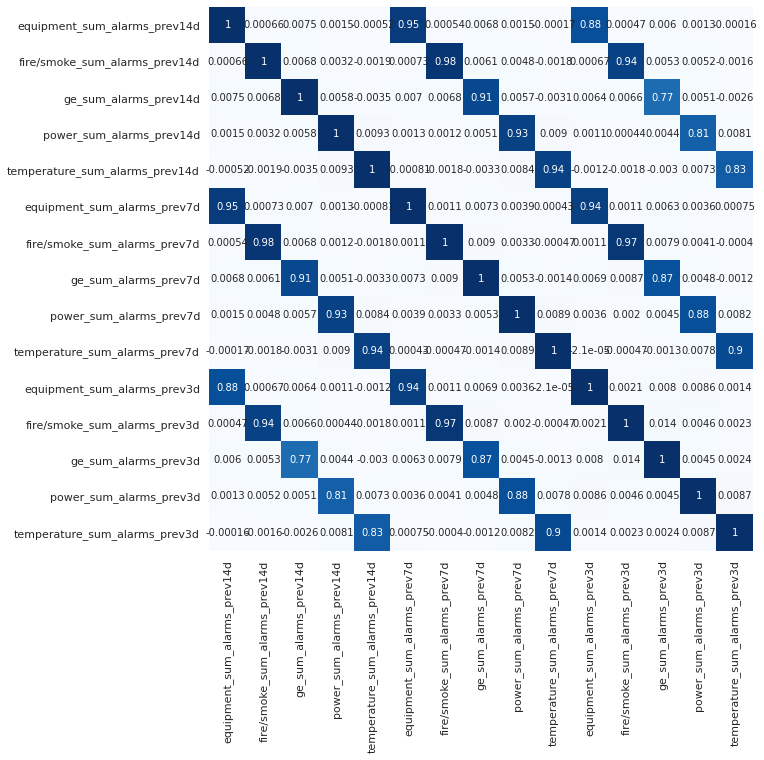

In [10]:
cov=pd.concat([cat_sum_alarms_prevXd], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [ ]:
#Now we aggregate the alarm's correlated columns and plot the correlation again
sorted_alarm_df = df.loc[: , 'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
sorted_alarm_df = sorted_alarm_df.reindex(sorted(sorted_alarm_df.columns, reverse=True), axis=1)
cov=pd.concat([sorted_alarm_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

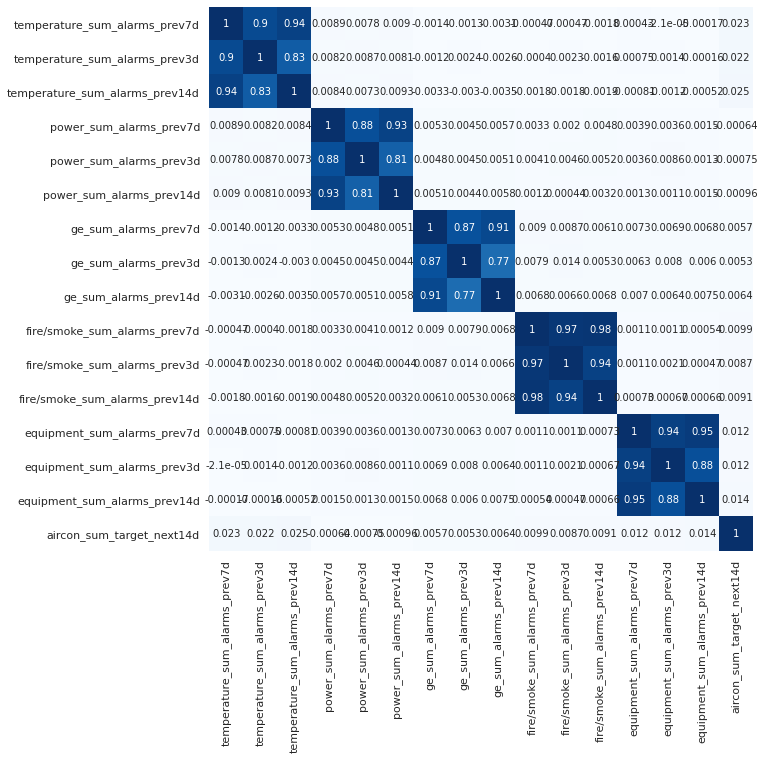

In [40]:
#correlate sorted alarm with respect to the target value
# cov=sorted_alarm_df.corr(method='pearson')[target_data][:]
cov=pd.concat([sorted_alarm_df, target_data], axis=1).corr(method='pearson')

plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [ ]:
cov=pd.concat([cat_m3_persistance_prevXd], axis=1).corr(method='pearson')
plt.figure(figsize = (20,20))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

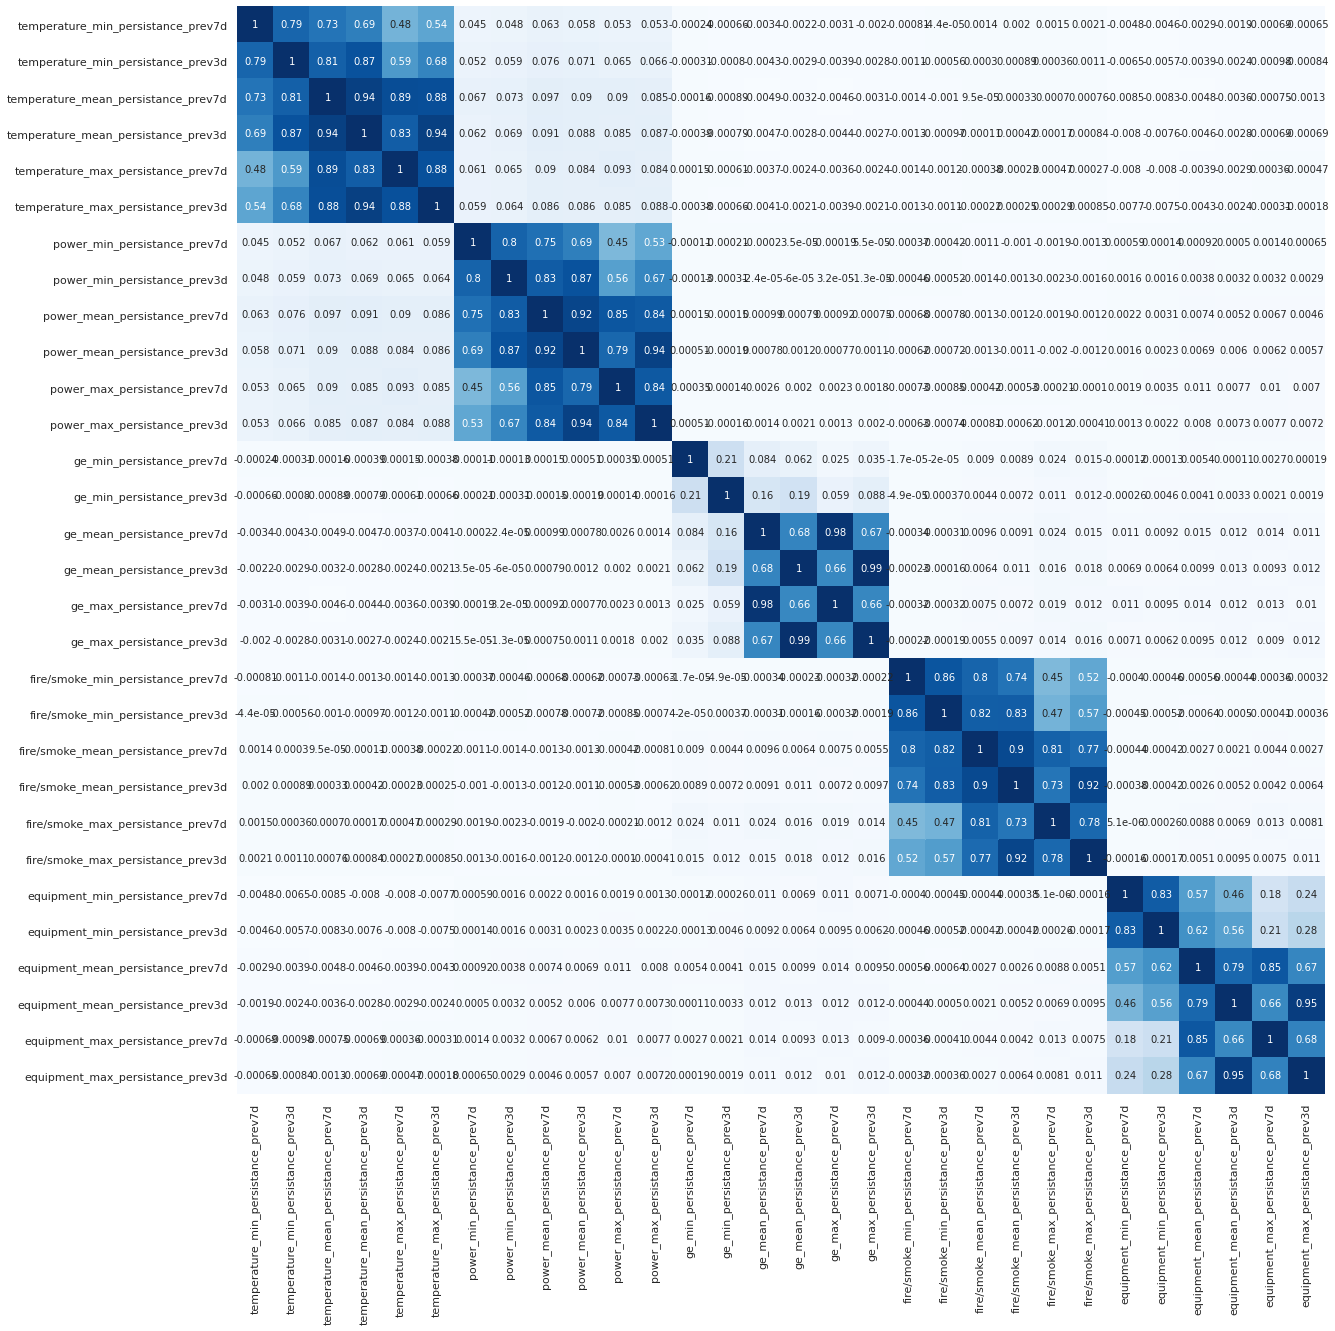

In [14]:
#Now we aggregate the persistance's correlated columns and plot the correlation again
sorted_persistance_df = (df.loc[:, 'equipment_max_persistance_prev7d': 'temperature_min_persistance_prev3d'])
sorted_persistance_df = sorted_persistance_df.reindex(sorted(sorted_persistance_df.columns, reverse=True), axis=1)
cov=pd.concat([sorted_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (20,20))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

<AxesSubplot:>

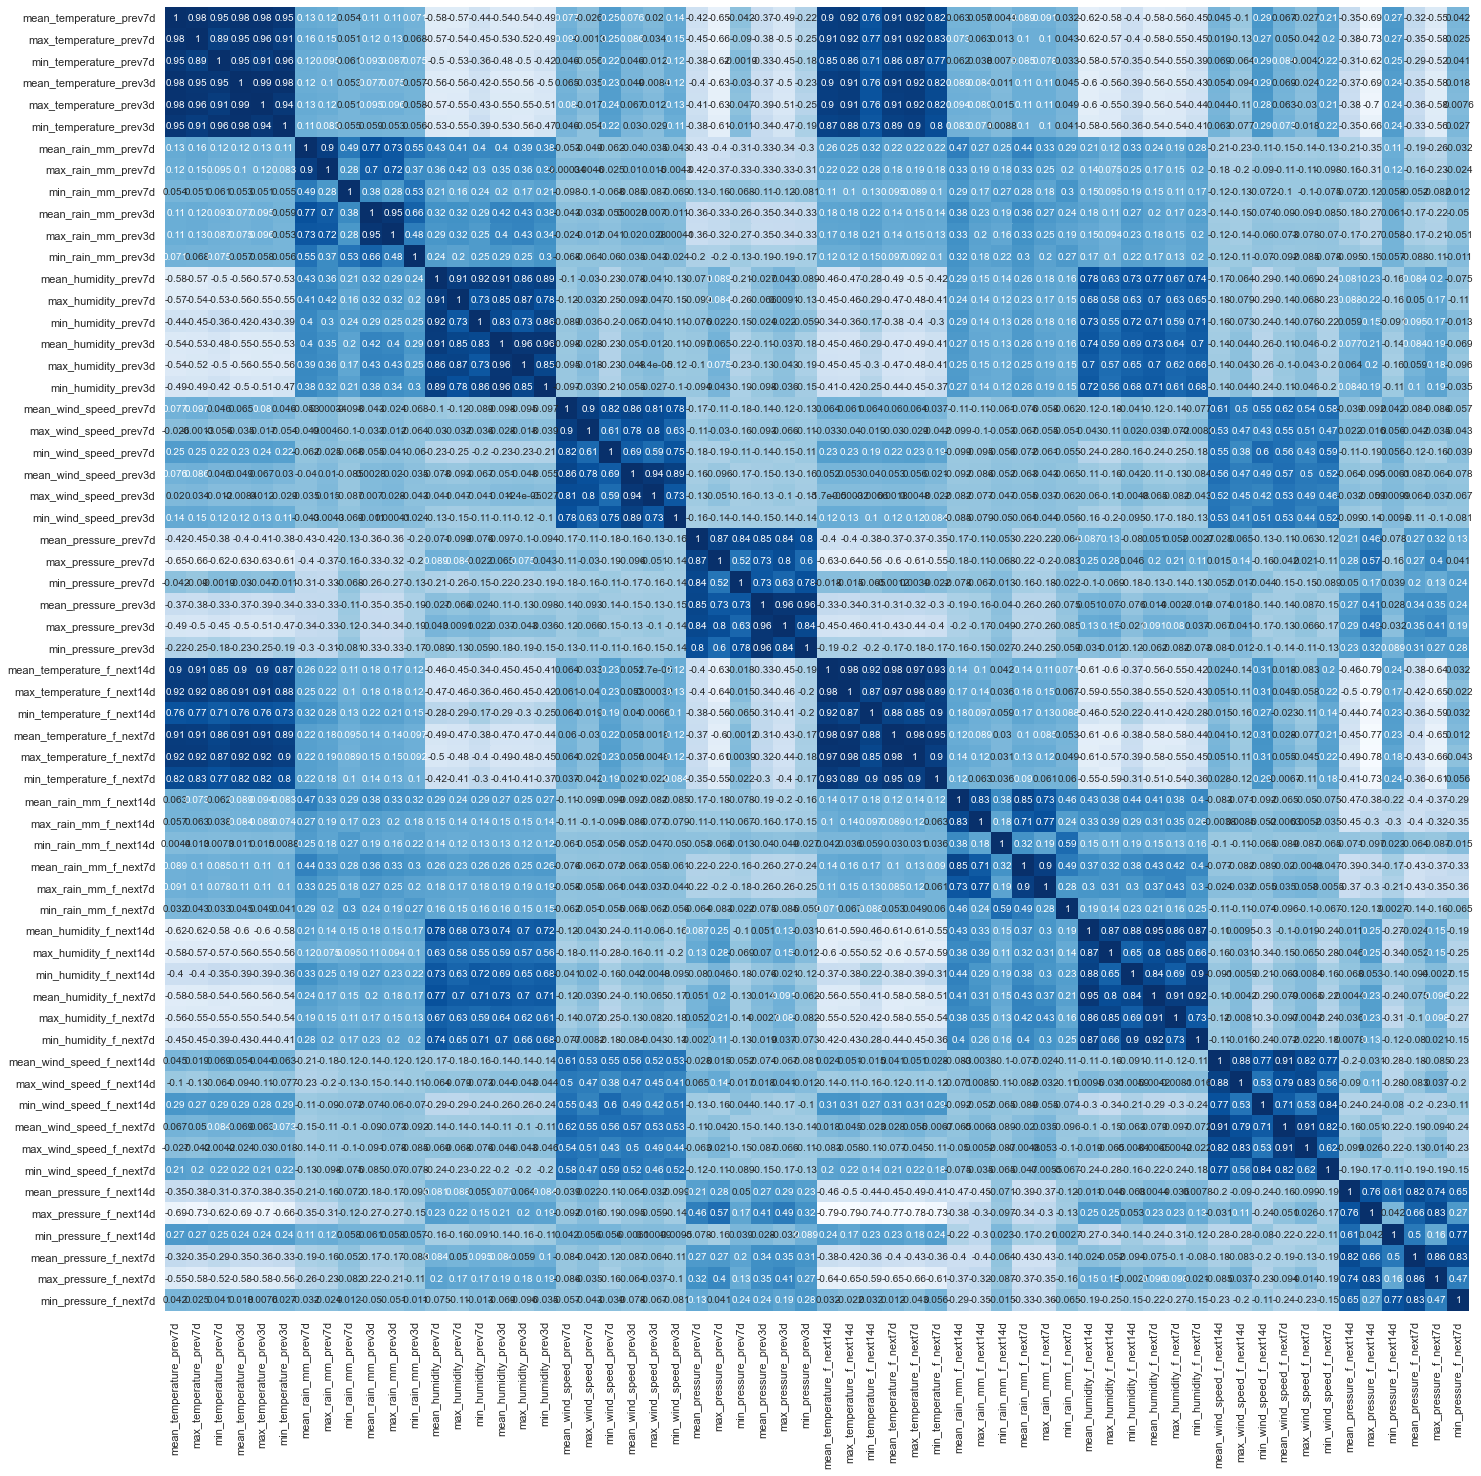

In [ ]:
cov=pd.concat([m3_w_prevXd,m3_w_f_nextXd], axis=1).corr(method='pearson')
plt.figure(figsize = (24,24))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [ ]:
sorted_Numerical_df = df.loc[: , 'mean_temperature_prev7d':'min_pressure_f_next7d']
sorted_Numerical_df = sorted_Numerical_df.reindex(sorted(sorted_Numerical_df.columns, reverse=True), axis=1)
Numerical_columns_list = (list(sorted_Numerical_df.columns))
New_Numerical_columns_list = []
for column in Numerical_columns_list:
  New_column = column.replace('_',' ')
  New_Numerical_columns_list.append(New_column)

New_Numerical_columns_list.sort(key=lambda s: s.split()[1])

Numerical_columns_list.clear()
for column in New_Numerical_columns_list:
  New_column = column.replace(' ','_')
  Numerical_columns_list.append(New_column)

sorted_Numerical_df = df[sorted_Numerical_columns_list]
sorted_Numerical_df

In [30]:
# sort Numerical values
def sorted_m3_numerical_values(numerical_df):
  sorted_Numerical_df = numerical_df.reindex(sorted(numerical_df.columns, reverse=True), axis=1)
  sorted_Numerical_columns_list = (list(sorted_Numerical_df.columns))
  New_Numerical_columns_list = []
  for column in sorted_Numerical_columns_list:
    New_column = column.replace('_',' ')
    New_Numerical_columns_list.append(New_column)

  New_Numerical_columns_list.sort(key=lambda s: s.split()[1])

  sorted_Numerical_columns_list.clear()
  for column in New_Numerical_columns_list:
    New_column = column.replace(' ','_')
    sorted_Numerical_columns_list.append(New_column)
  
  #drop the dataframe
  sorted_Numerical_df = sorted_Numerical_df.iloc[0:0]
  
  sorted_Numerical_df = numerical_df[sorted_Numerical_columns_list]
  return sorted_Numerical_df


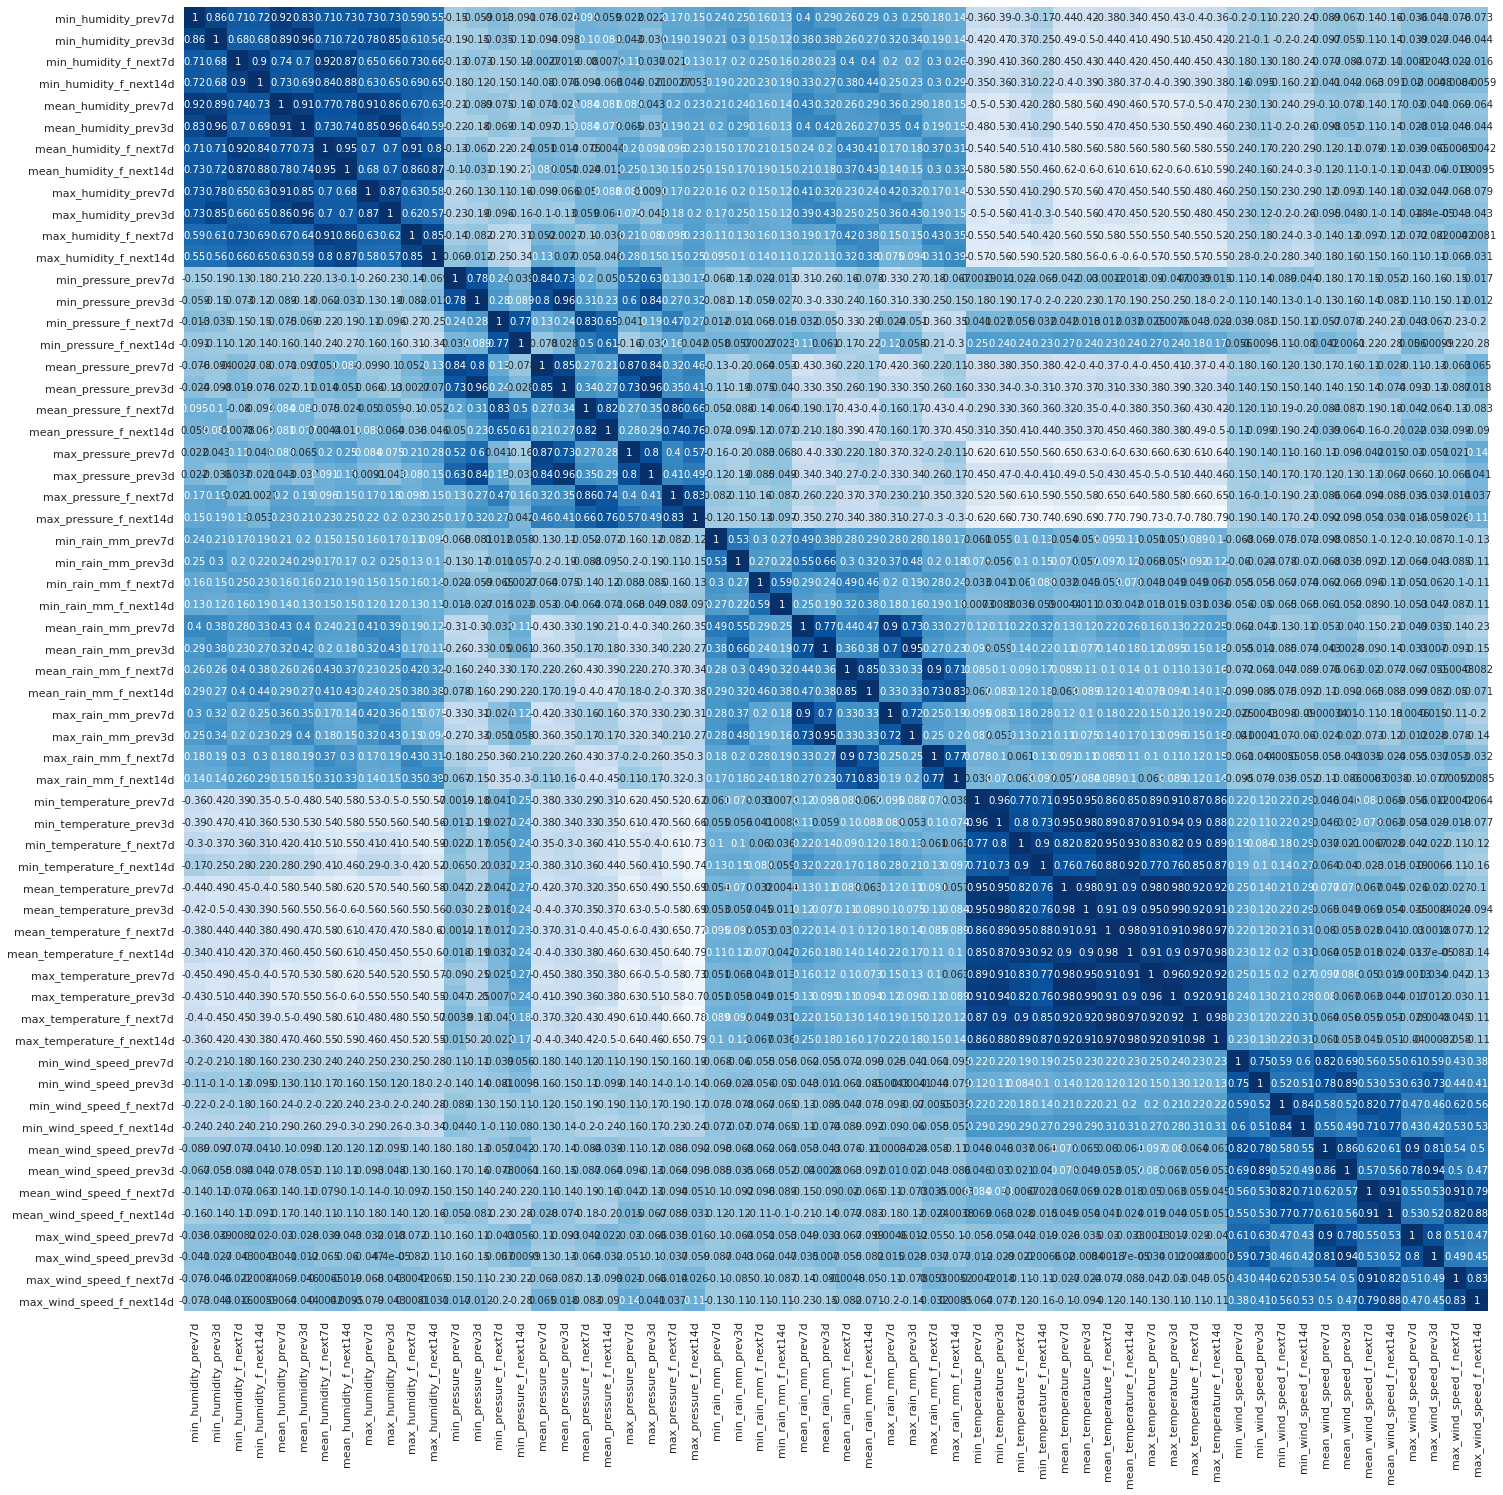

In [31]:
#Now we aggregate the Numerical's correlated columns and plot the correlation again
Numerical_df = df.loc[: , 'mean_temperature_prev7d':'min_pressure_f_next7d']
sorted_Numerical_df = sorted_m3_numerical_values(Numerical_df)
cov=pd.concat([sorted_Numerical_df], axis=1).corr(method='pearson')
plt.figure(figsize = (24,24))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)


# Variables Analysis

value counts
2047    300
680     300
672     300
2208    300
161     300
       ... 
340     300
852     300
1364    300
1876    300
0       300
Name: SITE_ID, Length: 2071, dtype: int64
Null Values:  False


<AxesSubplot:>

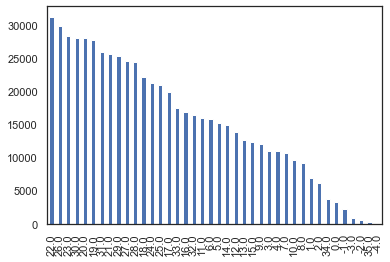

In [ ]:
#StoreType: 4 types
print('value counts')
print(input_data['SITE_ID'].value_counts())
print("Null Values: ",input_data['SITE_ID'].isnull().any())
input_data['max_temperature_prev7d'].value_counts().plot.bar()

In [ ]:
np.min(input_data['SITE_ID'].value_counts())

300

In [ ]:
#AssortmentType
print(train_data['AssortmentType'].value_counts())
print("Null Values: ",train_data['AssortmentType'].isnull().any())
train_data['AssortmentType'].value_counts().plot.bar()

KeyError: 'AssortmentType'

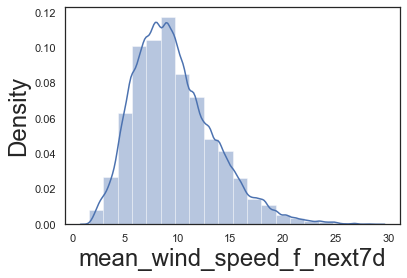

In [ ]:
#NearestCompetitor
hist1 = sns.distplot(train_data['mean_wind_speed_f_next7d'],bins=20)

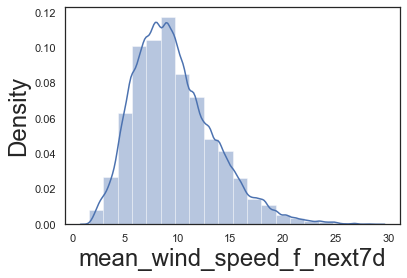

In [ ]:
hist2 = sns.distplot(train_data[train_data['mean_wind_speed_f_next7d']<20000]['mean_wind_speed_f_next7d'],bins=20)